<a href="https://colab.research.google.com/github/ngcthanh2903/pytorch/blob/main/cifar10torchGPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from keras.datasets import cifar10

In [46]:
(x_train, y_train), (x_test, y_test) =cifar10.load_data()
print(x_test.dtype)

uint8


In [47]:
x_train=x_train.reshape(-1,3,32,32)
x_test=x_test.reshape(-1,3,32,32)


In [48]:
print(x_train.shape)
print(x_test.shape)

(50000, 3, 32, 32)
(10000, 3, 32, 32)


In [49]:
import torch
import torch.nn as nn
import torch.optim.adam as adam
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset
from torchsummary import summary
import matplotlib.pyplot as plt
import os
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np


In [50]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_test = torch.from_numpy(x_test)
y_test = torch.from_numpy(y_test)
x_train = x_train.to(torch.float32)
x_test = x_test.to(torch.float32)

In [51]:
batch_size =64
train_ds = TensorDataset(x_train,y_train)
test_ds = TensorDataset(x_test,y_test)
train_dl = DataLoader(train_ds,batch_size,shuffle=True)
test_dl = DataLoader(test_ds,batch_size,shuffle=True)

In [52]:
y_train.shape


torch.Size([50000, 1])

In [53]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3,padding=2)
        self.conv2 = nn.Conv2d(32,64,kernel_size= 3,padding=2)
        self.conv3 = nn.Conv2d(64,64,kernel_size=3,padding=2)
        self.conv3_drop = nn.Dropout2d()
        self.conv4 = nn.Conv2d(64,128,kernel_size=3,padding=2)
        self.fc1 = nn.Linear(1152, 100)
        self.fc2 = nn.Linear(100, 10)

        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.relu(F.max_pool2d(self.conv3_drop(self.conv3(x)), 2))
        x = F.relu(F.max_pool2d(self.conv4(x), 2))
        #print(x.shape)
        #print(x.reshape(x.shape[0],-1).shape)
        x = x.view(-1, 1152)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [54]:
from torchsummary import summary
model = Net()
model.cuda()

summary(model, (3, 32, 32))
loss_fn = CrossEntropyLoss()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 34, 34]             896
            Conv2d-2           [-1, 64, 19, 19]          18,496
            Conv2d-3           [-1, 64, 11, 11]          36,928
         Dropout2d-4           [-1, 64, 11, 11]               0
            Conv2d-5            [-1, 128, 7, 7]          73,856
            Linear-6                  [-1, 100]         115,300
            Linear-7                   [-1, 10]           1,010
Total params: 246,486
Trainable params: 246,486
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.63
Params size (MB): 0.94
Estimated Total Size (MB): 1.58
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [70]:
model = nn.Sequential()
model.add_module('conv1',nn.Conv2d(3,32,kernel_size=3,padding = 'same'))
model.add_module('relu1',nn.ReLU())
model.add_module('conv2',nn.Conv2d(32,32,kernel_size=3,padding='same'))
model.add_module('relu2',nn.ReLU())
model.add_module('pool1',nn.MaxPool2d(2))
model.add_module('bn1',nn.BatchNorm2d(32))

model.add_module('conv3',nn.Conv2d(32,64,kernel_size=3,padding = 'same'))
model.add_module('relu3',nn.ReLU())
model.add_module('conv4',nn.Conv2d(64,64,kernel_size=3,padding='same'))
model.add_module('relu4',nn.ReLU())
model.add_module('pool2',nn.MaxPool2d(2))
model.add_module('bn2',nn.BatchNorm2d(64))

model.add_module('conv5',nn.Conv2d(64,128,kernel_size=3,padding = 'same'))
model.add_module('relu5',nn.ReLU())
model.add_module('conv6',nn.Conv2d(128,128,kernel_size=3,padding='same'))
model.add_module('relu6',nn.ReLU())
model.add_module('pool3',nn.MaxPool2d(2))
model.add_module('bn3',nn.BatchNorm2d(128))

model.add_module('conv7',nn.Conv2d(128,256,kernel_size=3,padding = 'same'))
model.add_module('relu7',nn.ReLU())
model.add_module('conv8',nn.Conv2d(256,256,kernel_size=3,padding='same'))
model.add_module('relu8',nn.ReLU())
model.add_module('pool4',nn.MaxPool2d(2))
model.add_module('bn4',nn.BatchNorm2d(256))


model.add_module('flatten',nn.Flatten())
#x= torch.ones((64, 3, 32, 32))
#model(x).shape
model.add_module('dropout',nn.Dropout(p=0.25))
model.add_module('dense',nn.Linear(1024,252))
model.add_module('dene2',nn.Linear(252,10))
model(x).shape
from torchsummary import summary
model.cuda()
summary(model, (3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
            Conv2d-3           [-1, 32, 32, 32]           9,248
              ReLU-4           [-1, 32, 32, 32]               0
         MaxPool2d-5           [-1, 32, 16, 16]               0
       BatchNorm2d-6           [-1, 32, 16, 16]              64
            Conv2d-7           [-1, 64, 16, 16]          18,496
              ReLU-8           [-1, 64, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]          36,928
             ReLU-10           [-1, 64, 16, 16]               0
        MaxPool2d-11             [-1, 64, 8, 8]               0
      BatchNorm2d-12             [-1, 64, 8, 8]             128
           Conv2d-13            [-1, 128, 8, 8]          73,856
             ReLU-14            [-1, 12

In [71]:
loss_fn = CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [72]:
n_epochs = 10
log_interval = 10
torch.backends.cudnn.enabled = True
torch.manual_seed(1)

In [73]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [74]:

for epoch in range(n_epochs+1):
  model.train()
  correct = 0
  for batch_idx, (data, target) in enumerate(train_dl):
    data = data.type(torch.cuda.FloatTensor)
    #target = target.type(torch.cuda.FloatTensor)
    optimizer.zero_grad()
    output = model(data)
    target = target.squeeze(1)
    #output, target = output.type(torch.cuda.FloatTensor), target.type(torch.cuda.FloatTensor)
    #loss = F.nll_loss(output, target)
    #correct += output.eq(target.data.view_as(output)).sum()
    loss = loss_fn(output,target.to(device))
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), len(train_dl.dataset),100. * batch_idx / len(train_dl), loss.item()))
      torch.save(model.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

Train Epoch: 0 [0/50000 (0%)]	Loss: 2.369097
Train Epoch: 0 [640/50000 (1%)]	Loss: 2.045074
Train Epoch: 0 [1280/50000 (3%)]	Loss: 2.009960
Train Epoch: 0 [1920/50000 (4%)]	Loss: 2.126073
Train Epoch: 0 [2560/50000 (5%)]	Loss: 2.318980
Train Epoch: 0 [3200/50000 (6%)]	Loss: 2.442873
Train Epoch: 0 [3840/50000 (8%)]	Loss: 2.181601
Train Epoch: 0 [4480/50000 (9%)]	Loss: 1.940383
Train Epoch: 0 [5120/50000 (10%)]	Loss: 2.212939
Train Epoch: 0 [5760/50000 (12%)]	Loss: 2.137083
Train Epoch: 0 [6400/50000 (13%)]	Loss: 1.880618
Train Epoch: 0 [7040/50000 (14%)]	Loss: 2.226659
Train Epoch: 0 [7680/50000 (15%)]	Loss: 2.129822
Train Epoch: 0 [8320/50000 (17%)]	Loss: 1.914973
Train Epoch: 0 [8960/50000 (18%)]	Loss: 1.995107
Train Epoch: 0 [9600/50000 (19%)]	Loss: 1.992796
Train Epoch: 0 [10240/50000 (20%)]	Loss: 1.980098
Train Epoch: 0 [10880/50000 (22%)]	Loss: 1.800771
Train Epoch: 0 [11520/50000 (23%)]	Loss: 1.889899
Train Epoch: 0 [12160/50000 (24%)]	Loss: 1.933161
Train Epoch: 0 [12800/50000 

In [75]:
#model #= Net()
#Model=model
model.load_state_dict(torch.load('model.pth'))


<All keys matched successfully>

tensor([2], dtype=torch.uint8)
tensor([2], device='cuda:0')


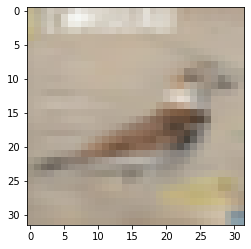

In [78]:
import matplotlib.pyplot as plt
test = x_test[70].reshape(1,3,32,32)
print(y_test[70])
test.shape
test = test.type(torch.cuda.FloatTensor)
print(torch.argmax(model(test),dim=1))#.dtype)
plt.imshow(test.to(torch.uint8).cpu().numpy().reshape(32,32,3))

tensor([9], dtype=torch.uint8)
tensor([9], device='cuda:0')


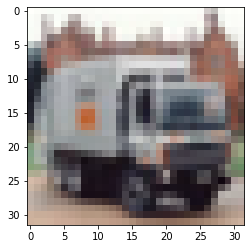

In [89]:

import matplotlib.pyplot as plt
test = x_test[11].reshape(1,3,32,32)
print(y_test[11])
test.shape
test = test.type(torch.cuda.FloatTensor)
print(torch.argmax(model(test),dim=1))#.dtype)
plt.imshow(test.to(torch.uint8).cpu().numpy().reshape(32,32,3))